In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_survey_results_publics = pd.read_csv('./Survey/survey_results_public.csv')
df_survey_results_publics

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [3]:
df_filter = df_survey_results_publics[['ProgramHobby', 'Country', 'University', 'EmploymentStatus','CompanySize', 
                    'YearsProgram', 'DeveloperType', 'HaveWorkedLanguage', 'Gender', 'JobSatisfaction', 'Salary']]
df_filter.head()

,ProgramHobby,Country,University,EmploymentStatus,CompanySize,YearsProgram,DeveloperType,HaveWorkedLanguage,Gender,JobSatisfaction,Salary
0,"Yes, both",United States,No,"Not employed, and not looking for work",NaN,2 to 3 years,NaN,Swift,Male,NaN,NaN
1,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,20 to 99 employees,9 to 10 years,NaN,JavaScript; Python; Ruby; SQL,Male,NaN,NaN
2,"Yes, both",United Kingdom,No,Employed full-time,"10,000 or more employees",20 or more years,Other,Java; PHP; Python,Male,9.0,113750.0
3,"Yes, both",United States,No,Employed full-time,"10,000 or more employees",14 to 15 years,NaN,Matlab; Python; R; SQL,Male,3.0,NaN
4,"Yes, I program as a hobby",Switzerland,No,Employed full-time,10 to 19 employees,20 or more years,Mobile developer; Graphics programming; Deskto...,NaN,NaN,8.0,NaN


In [4]:
df_filter.isnull().sum()

ProgramHobby              0
Country                   0
University                0
EmploymentStatus          0
CompanySize           12470
YearsProgram            247
DeveloperType         15267
HaveWorkedLanguage    14767
Gender                16345
JobSatisfaction       11016
Salary                38501
dtype: int64

In [5]:
for i in df_filter.columns:
    print(df_survey_results_publics[i].value_counts())
    print('---------------------------------------------------------------------------------------')

Yes, I program as a hobby                    24801
Yes, both                                    13756
No                                            9787
Yes, I contribute to open source projects     3048
Name: ProgramHobby, dtype: int64
---------------------------------------------------------------------------------------
United States      11455
India               5197
United Kingdom      4395
Germany             4143
Canada              2233
                   ...  
Pitcairn Island        1
French Guyana          1
Gabon                  1
Monaco                 1
Saint Helena           1
Name: Country, Length: 201, dtype: int64
---------------------------------------------------------------------------------------
No                     37543
Yes, full-time          9369
Yes, part-time          3352
I prefer not to say     1128
Name: University, dtype: int64
---------------------------------------------------------------------------------------
Employed full-time                  

In [6]:
df = df_filter.dropna(axis=0, how='any')
df.isnull().sum()

ProgramHobby          0
Country               0
University            0
EmploymentStatus      0
CompanySize           0
YearsProgram          0
DeveloperType         0
HaveWorkedLanguage    0
Gender                0
JobSatisfaction       0
Salary                0
dtype: int64

In [7]:
df.shape

(11597, 11)

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('---------------------------------------------------------------------------------------')

Yes, I program as a hobby                    5541
Yes, both                                    3291
No                                           2134
Yes, I contribute to open source projects     631
Name: ProgramHobby, dtype: int64
---------------------------------------------------------------------------------------
United States     3444
United Kingdom    1269
Germany            933
India              656
Canada             608
                  ... 
Bahrain              1
Seychelles           1
Guinea               1
Jamaica              1
Cuba                 1
Name: Country, Length: 130, dtype: int64
---------------------------------------------------------------------------------------
No                     10074
Yes, full-time           808
Yes, part-time           643
I prefer not to say       72
Name: University, dtype: int64
---------------------------------------------------------------------------------------
Employed full-time    11189
Employed part-time      408
Name: 

In this lesson, I will create new datafrane for HaveWorkedLanguage and DeveloperType, because old datafrane,each cell contain many value. To make datafrane convenien to analyst, I haved to split values in each cell and relocate in new row, each row contain only value of old cell 

In [9]:
# create df_prpgram_languages 
languages = df['HaveWorkedLanguage'].str.split("; ")

df_program_languages = pd.DataFrame({
    'HaveWorkedLanguage': [lang for langs in languages for lang in langs],
    'JobSatisfaction': df['JobSatisfaction'].repeat(languages.str.len()),
    'Salary': df['Salary'].repeat(languages.str.len())
}).reset_index().drop("index", axis=1)
list_languages = list(df_program_languages['HaveWorkedLanguage'].value_counts().index[:15])
df_program_languages['HaveWorkedLanguage'] = df_program_languages['HaveWorkedLanguage'].apply(lambda x: "Other" if x not in list_languages else x)

# create df_developer_type
developertype = df['DeveloperType'].str.split("; ")

df_developer_type= pd.DataFrame({
    'DeveloperType': [dev for devs in developertype for dev in devs],
    'JobSatisfaction': df['JobSatisfaction'].repeat(developertype.str.len()),
    'Salary': df['Salary'].repeat(developertype.str.len())
}).reset_index().drop("index", axis=1)


In [10]:
df_program_languages.HaveWorkedLanguage.value_counts()

JavaScript     7789
SQL            6251
C#             4402
Java           4384
Other          4211
Python         3304
PHP            2946
C++            2076
C              1611
TypeScript     1323
Ruby           1194
Objective-C     812
Swift           748
VB.NET          677
Go              563
Scala           521
Name: HaveWorkedLanguage, dtype: int64

In [11]:
df_developer_type["DeveloperType"].replace({"Embedded applications/devices developer": "Embedded", 
                                    "Developer with a statistics or mathematics background": "Backend with math or static"}, inplace=True)
df_developer_type["DeveloperType"] = df_developer_type["DeveloperType"].str.replace("developer", "dev", case=False)
df_developer_type.DeveloperType.value_counts()

Web dev                        8485
Desktop applications dev       3327
Mobile dev                     2407
Database administrator         1580
DevOps specialist              1410
Systems administrator          1292
Backend with math or static    1235
Embedded                       1021
Other                           989
Data scientist                  844
Graphics programming            433
Quality assurance engineer      391
Machine learning specialist     387
Graphic designer                319
Name: DeveloperType, dtype: int64

In [12]:
# valid data to easier when analyst
list_countries = list(df['Country'].value_counts().index[:10])
df['Country'] = df['Country'].apply(lambda x: "Other" if x not in list_countries else x)

list_genders = ['Male', 'Female', 'Other']
df['Gender'] = df['Gender'].apply(lambda x: "Other" if x not in list_genders else x)

list_answer = ['Yes', 'No']
df['ProgramHobby'] = df['ProgramHobby'].apply(lambda x: "Yes" if x not in list_answer else x)

df.drop(['HaveWorkedLanguage', 'DeveloperType'], axis=1, inplace=True)

for i in df.columns:
    print(df[i].value_counts())
    print('---------------------------------------------------------------------------------------')

Yes    9463
No     2134
Name: ProgramHobby, dtype: int64
---------------------------------------------------------------------------------------
United States     3444
Other             3287
United Kingdom    1269
Germany            933
India              656
Canada             608
France             426
Poland             292
Spain              236
Australia          234
Brazil             212
Name: Country, dtype: int64
---------------------------------------------------------------------------------------
No                     10074
Yes, full-time           808
Yes, part-time           643
I prefer not to say       72
Name: University, dtype: int64
---------------------------------------------------------------------------------------
Employed full-time    11189
Employed part-time      408
Name: EmploymentStatus, dtype: int64
---------------------------------------------------------------------------------------
20 to 99 employees          2759
100 to 499 employees        2377
10,0

C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\2210411185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].apply(lambda x: "Other" if x not in list_countries else x)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\2210411185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(lambda x: "Other" if x not in list_genders else x)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\2210411185.py:9: SettingWithCopyWarning: 
A value is trying to be

In [13]:
def count_element(df, col):
    list_element = []
    for row in df[col].str.split('; '):
        # Check null row
        if isinstance(row, list):
            # each programing language in row
            for element in row:
                # append each language to language list 
                list_element.append(element)
    count_data = pd.Series(list_element).value_counts()
    return count_data

In [14]:
def iplot_bar_pie_chart(data, layout):
    # data for Bar Chart
    bar_x_data = data.index
    bar_y_data = data.values
    
    # data for Pie Chart
    pie_labels = data.index
    pie_values = data.values
    
    # create subplot
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'pie'}]], 
                    column_widths=[0.6, 0.4], row_heights=[1], 
                    subplot_titles=('Bar Chart', 'Pie Chart'))
    # plot Bar Chart
    fig.add_trace(go.Bar(x=categories, y=values_bar), row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=1)
    
    # plot Pie Chart
    fig.add_trace(go.Pie(labels=labels_pie, values=values_pie), row=1, col=2)
    
    fig.update_layout(
        layout
    )
    pio.show(fig)
  
    

In [15]:
def plot_box_compare(df, col_group, col_val, layout):
    grouped_data = df.groupby(col_group)[col_val]
    mean_values = grouped_data.mean().sort_values(ascending=True)
    sorted_labels = mean_values.index.tolist()
    data = [grouped_data.get_group(label) for label in sorted_labels]
    labels = sorted_labels

    fig = plt.figure(figsize=(18,6))
    plt.boxplot(data, labels=labels, **layout)
    plt.grid(axis='y')

In [16]:
def plot_box_compare(df, col_group, col_val, layout, ax=None):
    grouped_data = df.groupby(col_group)[col_val]
    mean_values = grouped_data.mean().sort_values(ascending=True)
    sorted_labels = mean_values.index.tolist()
    data = [grouped_data.get_group(label) for label in sorted_labels]
    labels = sorted_labels

    if ax is None:
        fig, ax = plt.subplots(figsize=(18, 6))
    else:
        fig = ax.get_figure()

    ax.boxplot(data, labels=labels, **layout)
    ax.grid(axis='y')
    ax.set_xlabel(col_group, fontsize=14)
    ax.set_ylabel(col_val, fontsize=14)
    ax.set_title('Average ' + col_val + ' by ' + col_group, fontsize=16)
    ax.set_xticklabels(labels, rotation=15, ha='center')

    return fig, ax


C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\3609634217.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(x2, fontsize=18, ha='center')
C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\3609634217.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(x4, fontsize=18, rotation=10, ha='center')
C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\3609634217.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 2].set_xticklabels(x6, fontsize=18, rotation=10, ha='center')
C:\Users\DELL\AppData\Local\Temp\ipykernel_24568\3609634217.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 1].set_xticklabels(x8, fontsize=18, ha='center')


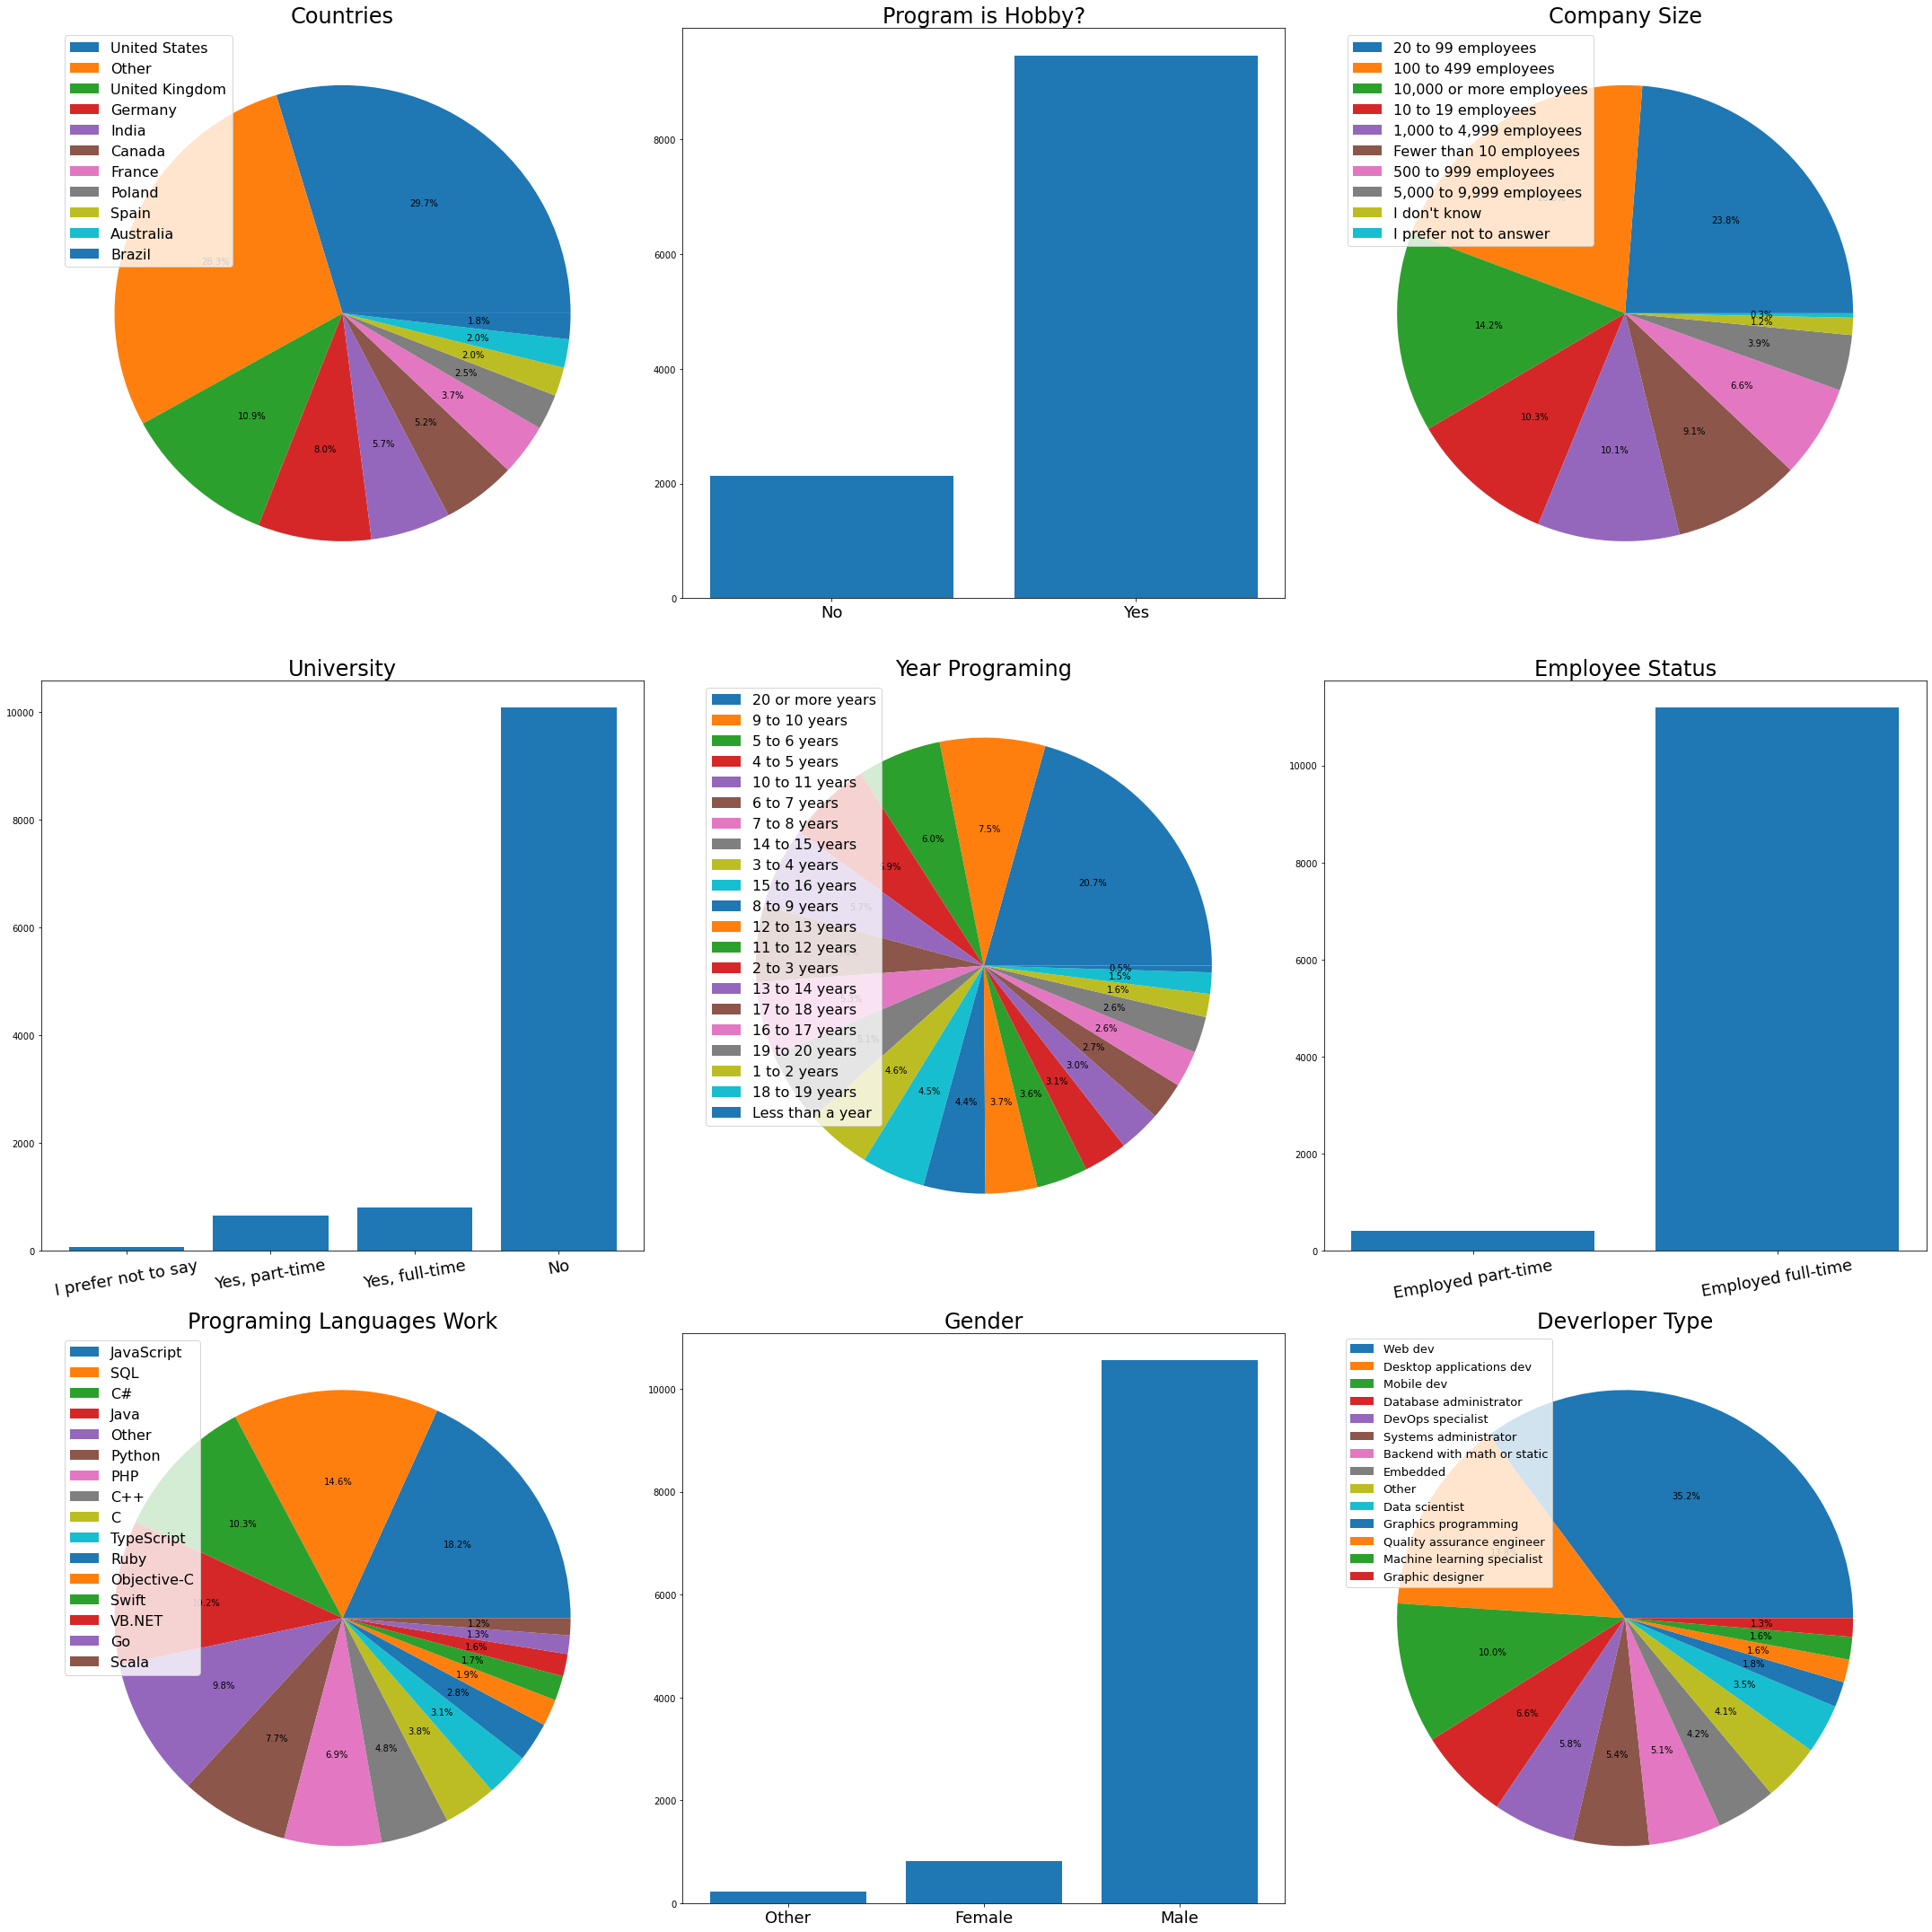

<Figure size 432x288 with 0 Axes>

In [17]:
# create data for each subplot
label1 = list(df.Country.value_counts().sort_values(ascending=False).index)
value1 = list(df.Country.value_counts().sort_values(ascending=False).values)

x2 = list(df.ProgramHobby.value_counts().sort_values(ascending=True).index)
y2 = list(df.ProgramHobby.value_counts().sort_values(ascending=True).values)

label3 = list(df.CompanySize.value_counts().sort_values(ascending=False).index)
value3 = list(df.CompanySize.value_counts().sort_values(ascending=False).values)

x4 = list(df.University.value_counts().sort_values(ascending=True).index)
y4 = list(df.University.value_counts().sort_values(ascending=True).values)

label5 = list(df.YearsProgram.value_counts().sort_values(ascending=False).index)
value5 = list(df.YearsProgram.value_counts().sort_values(ascending=False).values)

x6 = list(df.EmploymentStatus.value_counts().sort_values(ascending=True).index)
y6 = list(df.EmploymentStatus.value_counts().sort_values(ascending=True).values)

label7 = list(df_program_languages.HaveWorkedLanguage.value_counts().sort_values(ascending=False).index)
value7 = list(df_program_languages.HaveWorkedLanguage.value_counts().sort_values(ascending=False).values)

x8 = list(df.Gender.value_counts().sort_values(ascending=True).index)
y8 = list(df.Gender.value_counts().sort_values(ascending=True).values)

label9 = list(df_developer_type.DeveloperType.value_counts().sort_values(ascending=False).index)
value9 = list(df_developer_type.DeveloperType.value_counts().sort_values(ascending=False).values)


# Create subplot 
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
axs[0, 0].pie(value1, labels=[''] * len(label1), autopct='%1.1f%%')
axs[0, 0].legend(label1, bbox_to_anchor=(0, 1), loc='upper left', fontsize=16)
axs[0, 1].bar(x2, y2)
axs[0, 2].pie(value3, labels=[''] * len(label3), autopct='%1.1f%%')
axs[0, 2].legend(label3,bbox_to_anchor=(0, 1), loc='upper left', fontsize=16)
axs[1, 0].bar(x4, y4)
axs[1, 1].pie(value5, labels=[''] * len(label5), autopct='%1.1f%%')
axs[1, 1].legend(label5,bbox_to_anchor=(0, 1), loc='upper left', fontsize=16)
axs[1, 2].bar(x6, y6)
axs[2, 0].pie(value7, labels=[''] * len(label7), autopct='%1.1f%%')
axs[2, 0].legend(label7,bbox_to_anchor=(0, 1), loc='upper left', fontsize=16)
axs[2, 1].bar(x8, y8)
axs[2, 2].pie(value9, labels=[''] * len(label9), autopct='%1.1f%%')
axs[2, 2].legend(label9,bbox_to_anchor=(0, 1), loc='upper left', fontsize=13)

# Set name for each subplot
axs[0, 0].set_title('Countries', fontsize=24)
axs[0, 1].set_title('Program is Hobby?', fontsize=24)
axs[0, 2].set_title('Company Size', fontsize=24)
axs[1, 0].set_title('University', fontsize=24)
axs[1, 1].set_title('Year Programing', fontsize=24)
axs[1, 2].set_title('Employee Status', fontsize=24)
axs[2, 0].set_title('Programing Languages Work', fontsize=24)
axs[2, 1].set_title('Gender', fontsize=24)
axs[2, 2].set_title('Deverloper Type', fontsize=24)

axs[0, 1].set_xticklabels(x2, fontsize=18, ha='center')
axs[1, 0].set_xticklabels(x4, fontsize=18, rotation=10, ha='center')
axs[1, 2].set_xticklabels(x6, fontsize=18, rotation=10, ha='center')
axs[2, 1].set_xticklabels(x8, fontsize=18, ha='center')

# Hiển thị hình
plt.tight_layout()
plt.show()
plt.savefig('distribution.png', dpi=300)


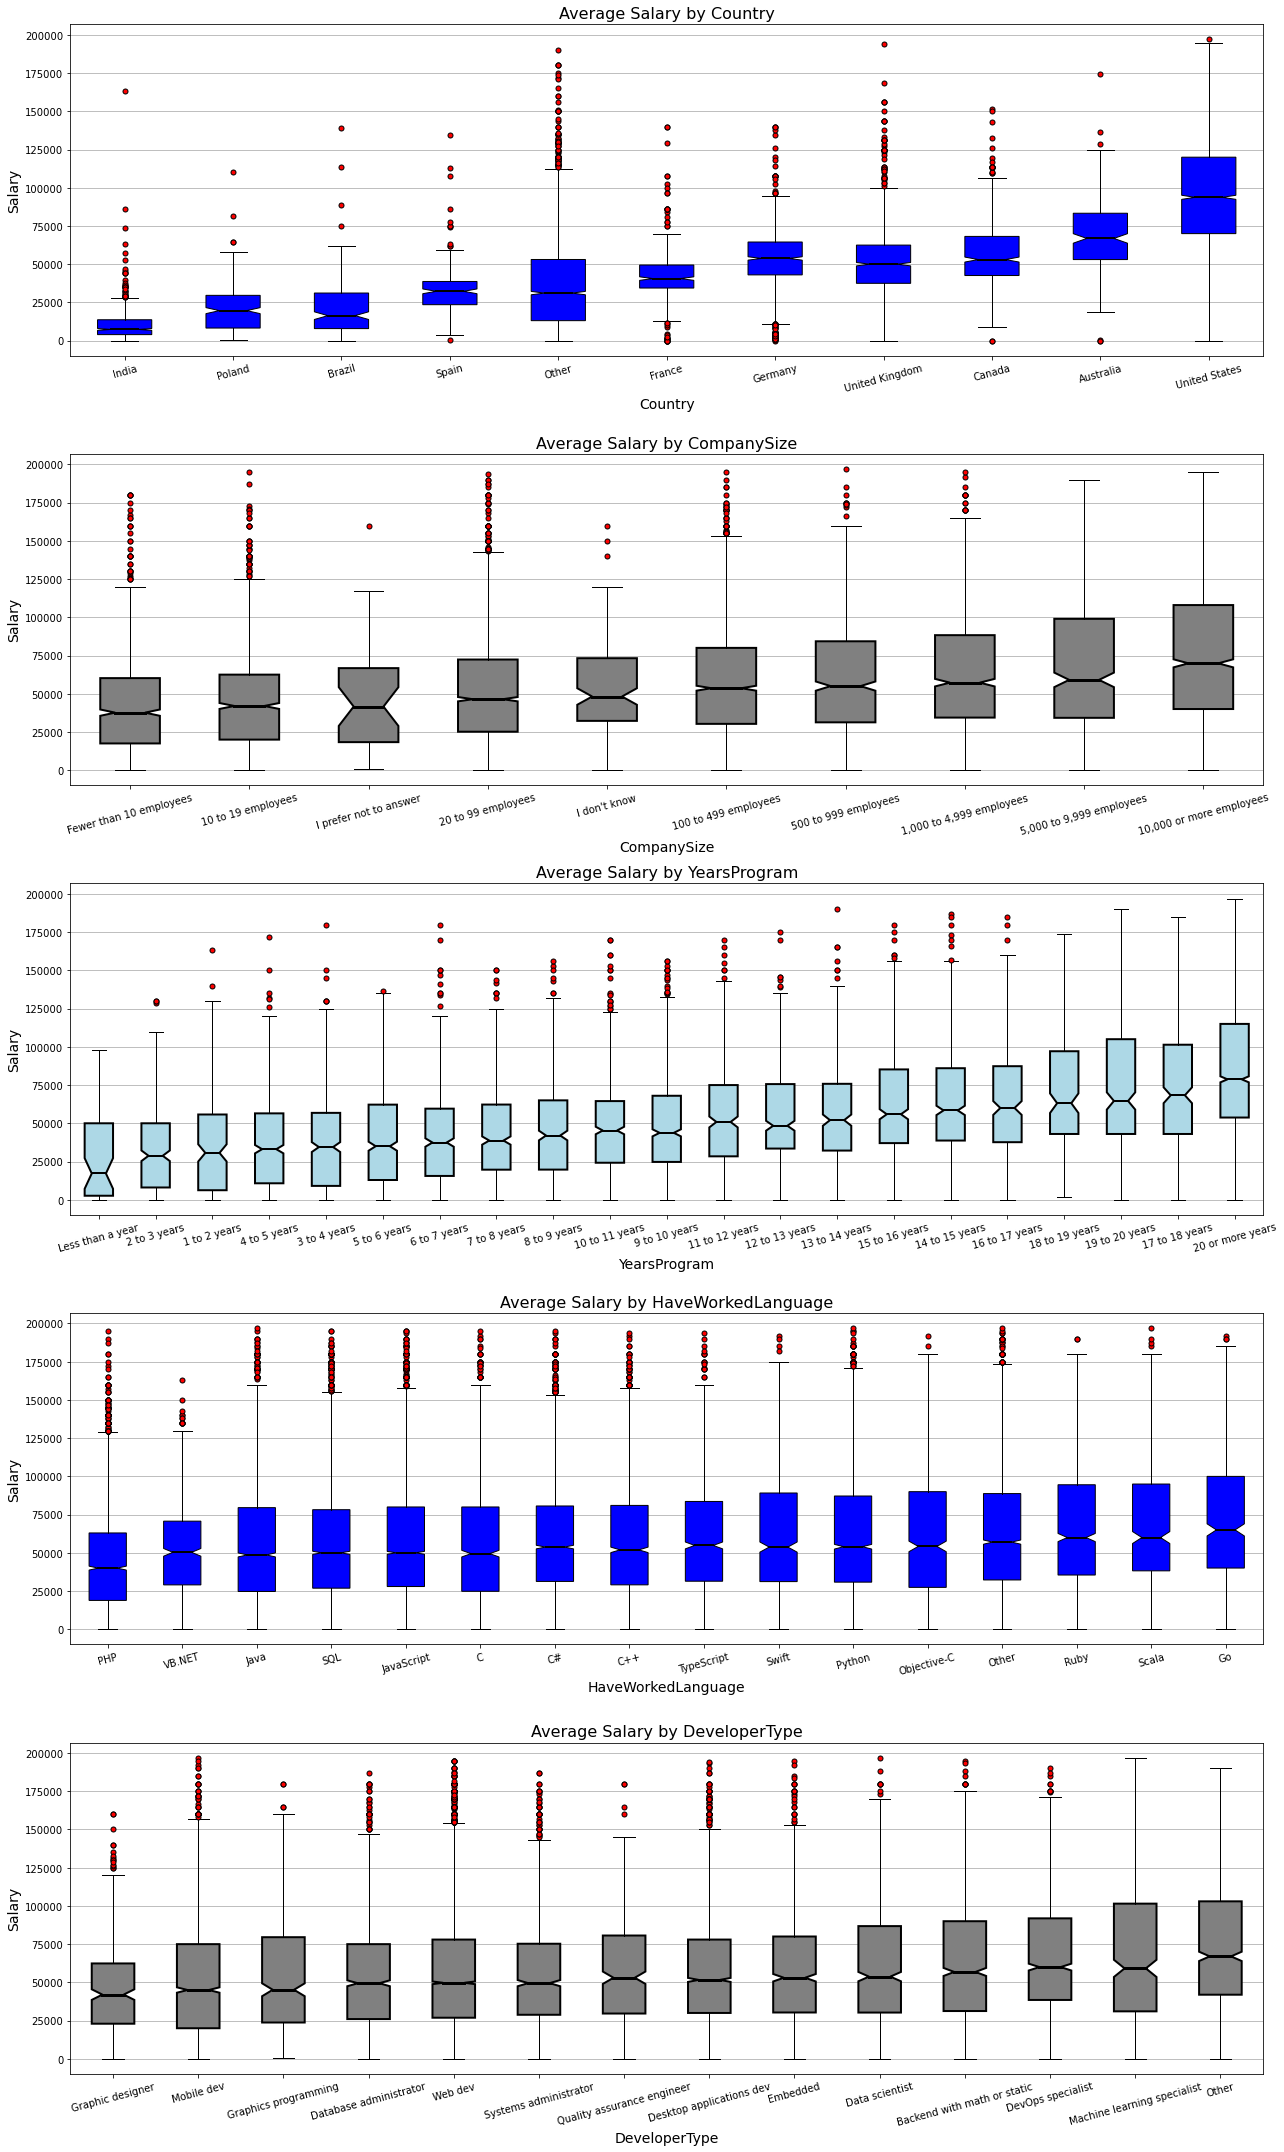

<Figure size 432x288 with 0 Axes>

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(18, 30))
layout1 = {
    'notch': True,
    'patch_artist': True,
    'boxprops': dict(facecolor='blue', color='black'),
    'whiskerprops': dict(color='black'),
    'capprops': dict(color='black'),
    'flierprops': dict(marker='o', markerfacecolor='red', markersize=5),
    'medianprops': dict(color='black', linewidth=2)
}
layout2 = {
    'notch': True,
    'patch_artist': True,
    'boxprops': dict(facecolor='gray', color='black', linewidth=2),
    'whiskerprops': dict(color='black'),
    'capprops': dict(color='black'),
    'flierprops': dict(marker='o', markerfacecolor='red', markersize=5),
    'medianprops': dict(color='black', linewidth=3)
}
layout3 = {
    'notch': True,
    'patch_artist': True,
    'boxprops': dict(facecolor='lightblue', color='black', linewidth=2),
    'whiskerprops': dict(color='black'),
    'capprops': dict(color='black'),
    'flierprops': dict(marker='o', markerfacecolor='red', markersize=5),
    'medianprops': dict(color='black', linewidth=2),
}


plot_box_compare(df, 'Country', 'Salary', layout1, ax=ax1)
plot_box_compare(df, 'CompanySize', 'Salary', layout2, ax=ax2)
plot_box_compare(df, 'YearsProgram', 'Salary', layout3, ax=ax3)
plot_box_compare(df_program_languages, 'HaveWorkedLanguage', 'Salary', layout1, ax=ax4)
plot_box_compare(df_developer_type, 'DeveloperType', 'Salary', layout2, ax=ax5)


plt.tight_layout()
plt.show()
plt.savefig('distributionBox.png', dpi=300)


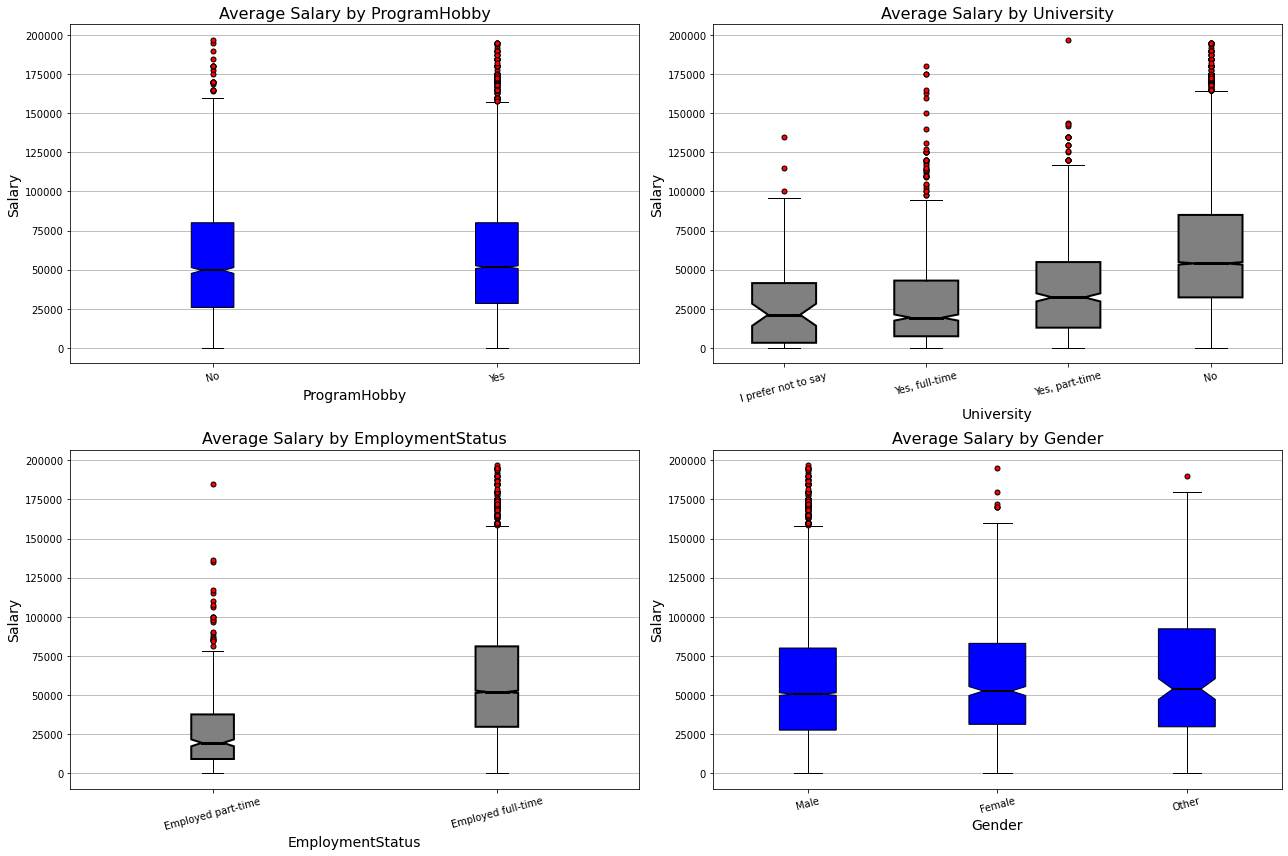

<Figure size 432x288 with 0 Axes>

In [19]:
fig, subplots = plt.subplots(2, 2, figsize=(18, 12))
ax1, ax2, ax3, ax4 = subplots[0][0], subplots[0][1], subplots[1][0], subplots[1][1]
layout1 = {
    'notch': True,
    'patch_artist': True,
    'boxprops': dict(facecolor='blue', color='black'),
    'whiskerprops': dict(color='black'),
    'capprops': dict(color='black'),
    'flierprops': dict(marker='o', markerfacecolor='red', markersize=5),
    'medianprops': dict(color='black', linewidth=2)
}
layout2 = {
    'notch': True,
    'patch_artist': True,
    'boxprops': dict(facecolor='gray', color='black', linewidth=2),
    'whiskerprops': dict(color='black'),
    'capprops': dict(color='black'),
    'flierprops': dict(marker='o', markerfacecolor='red', markersize=5),
    'medianprops': dict(color='black', linewidth=3)
}

plot_box_compare(df, 'ProgramHobby', 'Salary', layout1, ax=ax1)
plot_box_compare(df, 'University', 'Salary', layout2, ax=ax2)
plot_box_compare(df, 'EmploymentStatus', 'Salary', layout2, ax=ax3)
plot_box_compare(df, 'Gender', 'Salary', layout1, ax=ax4)


plt.tight_layout()
plt.show()
plt.savefig('disBox2.png', dpi=300)


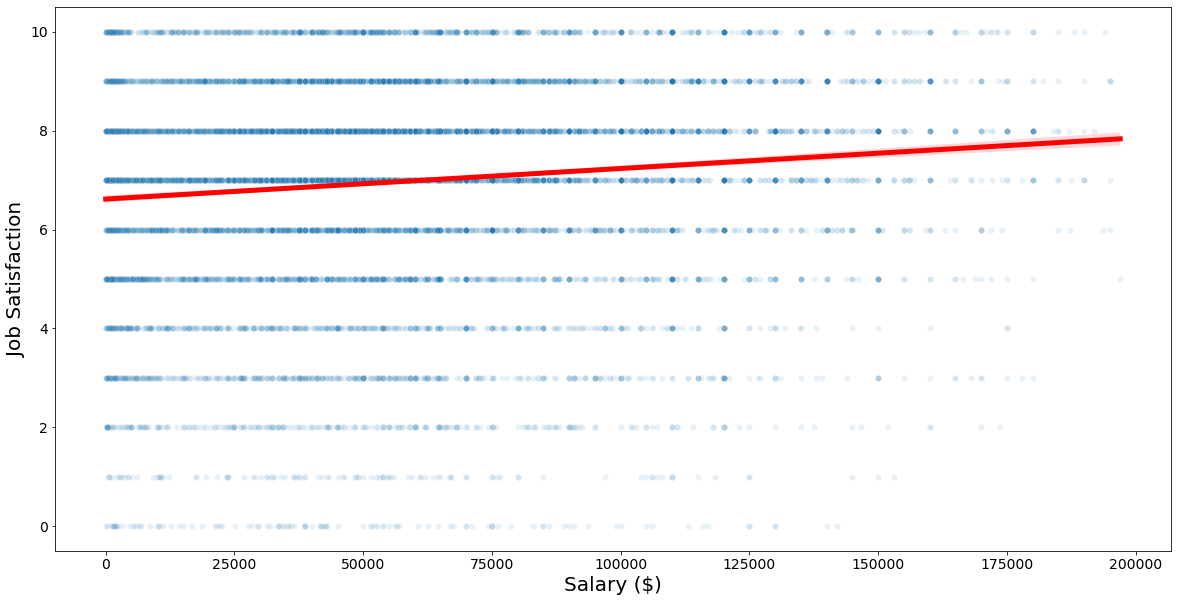

Slope: 6.185972897131369e-06
Intercept: 6.617520463374703
Correction:  0.1157199826920692


<Figure size 432x288 with 0 Axes>

In [20]:
fig = plt.figure(figsize=(20,10))
sns.regplot(x=df.Salary, y=df.JobSatisfaction, line_kws={'linewidth': 5}, scatter=False, color='red')
sns.scatterplot(x='Salary', y='JobSatisfaction', data=df, alpha=0.1)
plt.xlabel('Salary ($)', fontsize=20)
plt.xticks(fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=20)
plt.yticks(fontsize=14)
plt.show()
plt.savefig('Scatter.png', dpi=300)

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x=df.Salary, y=df.JobSatisfaction)
print("Slope:", slope)
print("Intercept:", intercept)
print("Correction: ",df['Salary'].corr(df['JobSatisfaction']))

